**Link do transmisji**: [https://www.youtube.com/watch?v=eHEFcbl3GsI](https://www.youtube.com/watch?v=eHEFcbl3GsI)

*Odkomentuj i wykonaj ten kod, jeżeli masz problemy z zaimportowaniem bibliotek.*

In [1]:
# !pip install numpy==1.24.2
# !pip install seaborn==0.12.2
# !pip install pandas==1.5.3
# !pip install scikit-learn==1.2.1

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['figure.figsize'] = (15, 7)

In [3]:
df_web_local_paths = {
    'https://raw.githubusercontent.com/Kolo-Naukowe-Data-Science-PW/PoweR_2023/main/01_feature_engineering/Python/data/census_01.csv': 'census_data_01.csv',
    'https://raw.githubusercontent.com/Kolo-Naukowe-Data-Science-PW/PoweR_2023/main/01_feature_engineering/Python/data/census_02.csv': 'census_data_02.csv',
    'https://raw.githubusercontent.com/Kolo-Naukowe-Data-Science-PW/PoweR_2023/main/01_feature_engineering/Python/data/census_03.csv': 'census_data_03.csv',
    'https://raw.githubusercontent.com/Kolo-Naukowe-Data-Science-PW/PoweR_2023/main/01_feature_engineering/Python/data/census_04.csv': 'census_data_04.csv'
}

for web_path, local_path in df_web_local_paths.items():
    tmp = pd.read_csv(web_path)
    tmp.to_csv(local_path, index=False)

In [4]:
df = pd.read_csv('census_data_01.csv')

# PoweR

# Część I: Feature engineering
*Prowadzący: Dawid Płudowski*

### Podstawowe pojęcia 

* **ramka danych** - dane w postaci tabeli (u nas `df`)

* **obserwacja** - wiersz ramki danych; zawiera informacje o pojdeynczym wydarzeniu/fakcie (`np. df.iloc[1]`)

* **zmienna objaśniana** - kolumna ramki danych, którą chcemy przewidywać za pomocą modelu uczenia maszynowego (u nas `df.loc[:, 'income']`)

* **zmienne objaśniające** - kolumny tabeli, na podstawie których chcemy przewidywać zmienną objaśniającą (np. `df['education']`)

* **wartość brakująca** - komórka tabeli, która nie ma wartości; potocznie `null`, w Pythonie `None` (czasami kodowana za pomocą wartości specjalnych)




In [5]:
%%capture

# podstawy pandasa
df.head(n=10) # pierwsze n wierszy z tabeli 
df.loc[1, 'income'] # .loc[wiersz, kolumna] wybiera komórki po nazwach indeksów, tj. nazw kolumn i wierszy
df.iloc[1, 5] # .iloc[wiersz, kolumna] wybiera po pozycji w tabeli, np. .iloc[5, 2] ~ 5. wiersz, 2. kolumna

In [6]:
df.head()

,age,workclass,final_pop_weight,education,marital_status,occupation,race,sex,capital_gain,work_hours_per_week,native_country,income
0,90,?,77053,Highschool,Widowed,?,White,Female,0.000000,40,United-States,1.0
1,82,Private,132870,Highschool,Widowed,Exec-managerial,White,Female,42128.866677,18,United-States,1.0
2,66,?,186061,College,Widowed,?,Black,Female,0.000000,40,United-States,1.0
3,54,Private,140359,primary school,Divorced,Machine-op-inspct,White,Female,0.000000,40,United-States,1.0
4,41,Private,264663,College,Separated,Prof-specialty,White,Female,0.000000,40,United-States,1.0


## Wartości brakujące

Szukamy w zbiorze danych wartości, które mogą kodować brak danych. Jak mogą wyglądać?

Zmienne kategoryczne:
* znaki zapytania
* puste napisy
* słowa-klucze, np. '*unknown*' , '*blank*'

Zmienne numeryczne:
* wartości spoza możliwego zakresu (np. 1000 w zmiennej `age`)
* wartość ujemna, jeżeli cała reszta jest dodatnia
* liczby, które często są stosowane do kodowania nulli, np. -999, 999

Po znalezieniu wartości, która reprezentuje wartość brakującą powinniśmy ją zakodować jako `None`, żeby później wygodnie z nią pracować.

**Uwaga**: biblioteka `pandas` oraz `numpy` posiadają własne oznaczenia na braki danych (`pd.NA`, `np.nan`, `np.NaN`), które nie są tym samym!

Artykuł o narzędziach do automatycznej analizy danych: [www.analyticsvidhya.com](https://www.analyticsvidhya.com/blog/2021/04/top-python-libraries-to-automate-exploratory-data-analysis-in-2021/)

In [7]:
%%capture

# przydatne funkcje

df['age'].hist() # wyświetla histogram wartości
df['occupation'].unique()
df[df['final_pop_weight'] < 0] # sposób na filtrowanie ramki danych
df['age'].mask(df['age'] > 80, None) # zamienia wartości, ktore spełniają warunek na None

### Zadanie 1. szukanie wartości brakujących w zbiorze `Census`

### Aktywność 1.
Czas: ok. 5min

Szukamy kolejnych braków danych w ramce i oznaczamy je jako `None`.

In [8]:
df = df.loc[~df['income'].isna(), :]

In [9]:
df['work_hours_per_week'] = df['work_hours_per_week'].mask(df['work_hours_per_week'] < 0, None) 

In [10]:
df['age'] = df['age'].mask(df['age'] > 100, None)

In [11]:
df['workclass'] = df['workclass'].mask(df['workclass'] == '?', None)
df['workclass'] = df['workclass'].mask(df['workclass'] == 'unknown', None)

# alternatywna składnia
df['workclass'] = df['workclass'].mask((df['workclass'] == 'unknown') | (df['workclass'] == '?'), None)
df['workclass'] = df['workclass'].mask(df['workclass'].isin(['?', 'unknown']), None)

In [12]:
df['occupation'] = df['occupation'].mask(df['occupation'] == '?', None)

In [13]:
df['marital_status'] = df['marital_status'].mask(df['marital_status'] == '???', None)

In [14]:
df['native_country'] = df['native_country'].mask(df['native_country'] == '?', None)

## Imputacja danych

Udało nam się zidentyfikować nulle w naszej ramce danych. Teraz musimy je uzupełnić, aby można na nich ćwiczyć model. Rodzaje braków danych możemy podzielić na następujące kategorie:
* Missing completely at random (**MCAR**)
* Missing at random (**MAR**)
* Missing not at random (nonignorable)

W przypadku naszych danych możemy założyć, że braki nie niosą ze sobą żadnej istotnej informacji (MCAR) i możemy je uzupełnić w konwencjonalny sposób. W przypadku danych numerycznych uzupełnimy je średnią, natomiast dane kategoryczne uzupełnimy najczęściej występującą wartością. Dlaczego taka strategia ma sens:
* jeżeli nic nie wiemy o naszym braku to, o ile pochodzi on z tego samego rozkładu co pozostałe dane, najmniej pomylimy się estymując go średnią/najczęściej występującą wartością

Artykuł o rodzajach braków danych: [displayr.com/different-types-of-missing-data/](https://www.displayr.com/different-types-of-missing-data/)

In [15]:
from sklearn.impute import SimpleImputer

In [16]:
%%capture

# przydatne funkcje
imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean') # zamienia NaN na średnią
imputer_mod = SimpleImputer(missing_values=np.nan, strategy='most_frequent') # zamienia NaN na najczęściej występującą wartość

imputer_mean.fit_transform(df[['capital_gain']]) 

**Uwaga**: dobrą praktyką jest unikanie `.fit_transform()`, zamiast tego lepiej użyć najpierw `.fit()`, później `.transform()` (efekt ten sam). Podczas warsztatów pracowaliśmy z jednym zestawem danych (na następnych dowiecie się, że zwykle pracuje się 2-3 zestawach podczas tworzenia modelu) i w takiej sytuacji użycie `.fit_transform()` jako wygodnego skrótu nie generuje problemów ;)

### Zadanie 2.
Imputujemy braki danych

### Aktywność 2.
Czas: ok. 3 min

Kontynuujemy uzupełniane nulli.

In [17]:
age_imputer = SimpleImputer(missing_values=pd.NA, strategy='mean')
df['age'] = age_imputer.fit_transform(df[['age']])

hours_imputer = SimpleImputer(missing_values=None, strategy='mean')
df['work_hours_per_week'] = age_imputer.fit_transform(df[['work_hours_per_week']])

workclass_imputer = SimpleImputer(missing_values=None, strategy='most_frequent')
df['workclass'] = workclass_imputer.fit_transform(df[['workclass']])

occupation_imputer = SimpleImputer(missing_values=None, strategy='most_frequent')
df['occupation'] = occupation_imputer.fit_transform(df[['occupation']])

marital_status_imputer = SimpleImputer(missing_values=None, strategy='most_frequent')
df['marital_status'] = marital_status_imputer.fit_transform(df[['marital_status']])

native_country_imputer = SimpleImputer(missing_values=None, strategy='most_frequent')
df['native_country'] = native_country_imputer.fit_transform(df[['native_country']])

## Szukanie outlierów

Nasze dane są już kompletne, jednak niektóre z nich, nawet jeżeli prawdziwe, mogą utrudnić modelowi proces uczenia. Dlaczego tak się dzieje?

### Wartości odstające 
Nasz zbiór danych zawiera pojedyncze obserwacje, które zaburzają przewidywanie.

**Przykład**:

Dysponujemy informacją o zawodzie (lub jego braku) grupy osób i chcemy przewidywać na podstawie tego wielkość ich oszczędności. Logiczne jest, że osoba bezrobotna powinna mieć ich raczej mniej niż np. data scientist. Jeżeli jednak w naszej grupie osób na 1.000 bezrobotnych jeden jest miliarderem (np. odziedziczył te pieniądze) to czy taka informacja nie jest myląca? Niektóre modele będą próbować uogólnić ten fakt i nauczą się, że skoro 999 osób z danej grupy ma 0zł oszczędności, a jedna 1.000.000.000zł to średnio osoba bezrobotna ma 1.000.000zł oszczędności.

Z drugiej strony, usunięcie podpopulacji miliarderów z danych sprawi, że nasz model nigdy nie nauczy się jak ich przewidywać.

### Generalizacja

Nigdy nie dysponujemy kompletnymi danymi o danym zjawisku, dlatego też chcielibyśmy, aby nasz model generalizował fakty. Tak jak w powyższym przykładzie, powiedzielibyśmy: "oszczędności ludzi bezrobotnych różnią się w zależności od innych czynników, ale generalnie są niskie".

### Małe grupy

Czasami dana cecha (np. bycie noblistą z fizyki) jest tak rzadka, że nie mamy wystarczająco dużo obserwacji, które by ją posiadały, aby móc model mógł na jej podstawie wyciągnąc wniosków. Czasami decydujemy się, aby takie małe podpopulacje łączyć ze sobą, w szczególności jeżeli podejrzewamy, że nie wykazują znaczących różnic (np. nobliści z fizyki i ekonomii). 

### Zadanie 3. 

Szukamy i usuwamy outliery ze zbioru danych


### Aktywność 3.
Czas: ok. 10min

Kontynuujemy poszukiwania outlierów. Istnieją różne strategie radzenia sobie z nimi, my wykorzystamy najprostszą, to znaczy "na oko" ;) Użyjemy w tym celu wykresów, aby zdecydować, gdzie "obciąć" wartości numeryczne oraz jak zgrupować wartości kategoryczne. 

In [18]:
%%capture

# przydatne funkcje
sns.countplot(data=df, x='education') # wykres dla zmiennych kategorycznych
sns.histplot(data=df, x='age', bins=100) # wykres dla zmiennych numerycznych

<Axes: xlabel='final_pop_weight', ylabel='Count'>

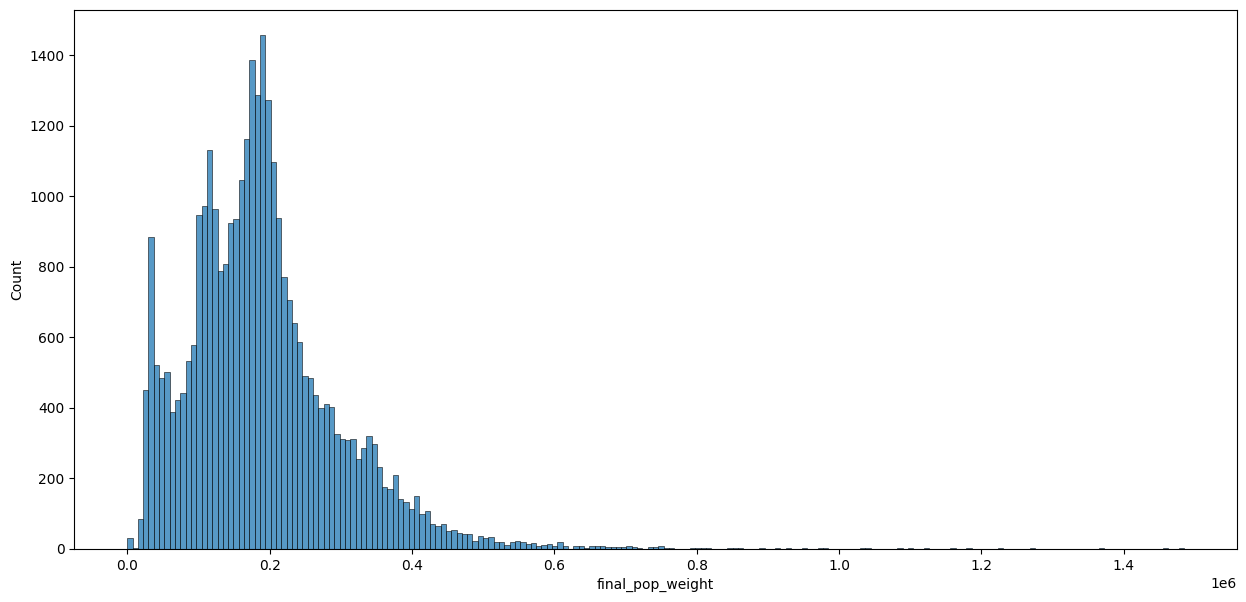

In [19]:
# ucinamy arbitralnie na wartości 1E6
sns.histplot(data=df, x='final_pop_weight')

In [20]:
df['final_pop_weight'] = df['final_pop_weight'].mask(df['final_pop_weight'] > 1E6, 1E6)

<Axes: xlabel='capital_gain', ylabel='Count'>

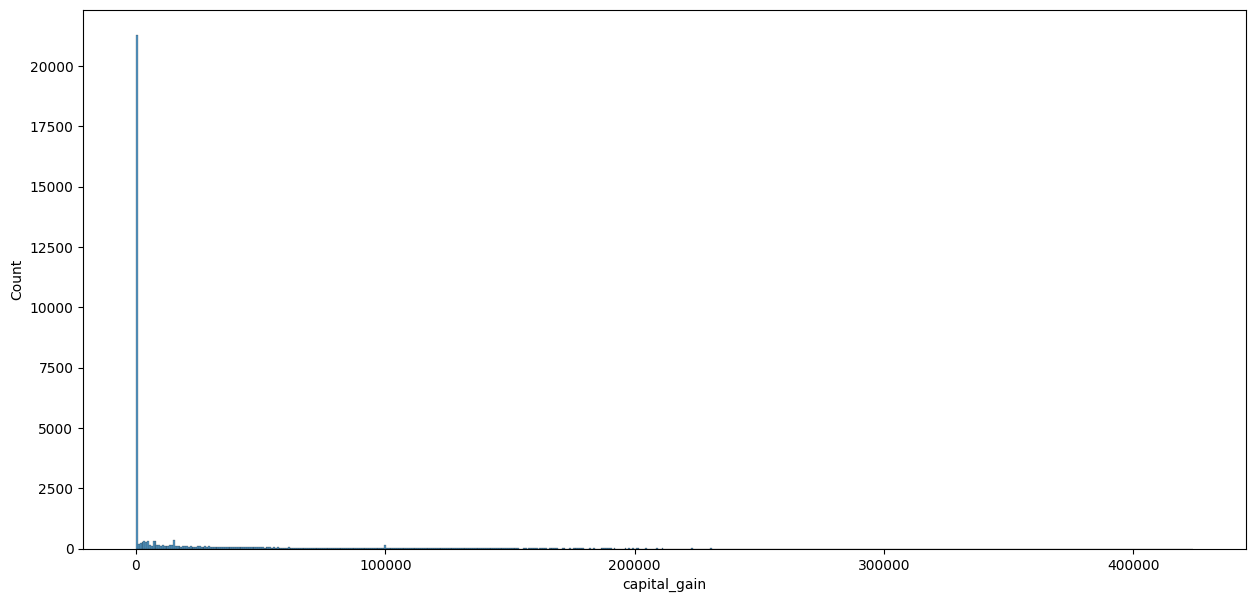

In [21]:
# większość osób ma zerowe zyski na giełdzie. Możemy podzielić osoby na te, które posiadają jakiekolwiek zyski i resztę
sns.histplot(data=df, x='capital_gain')

In [22]:
df['capital_gain'] = df['capital_gain'].mask(df['capital_gain'] > 0, '>0')
df['capital_gain'] = df['capital_gain'].mask(df['capital_gain'] == 0, '=0')

df['capital_gain'].unique()

array(['=0', '>0'], dtype=object)

<Axes: xlabel='work_hours_per_week', ylabel='Count'>

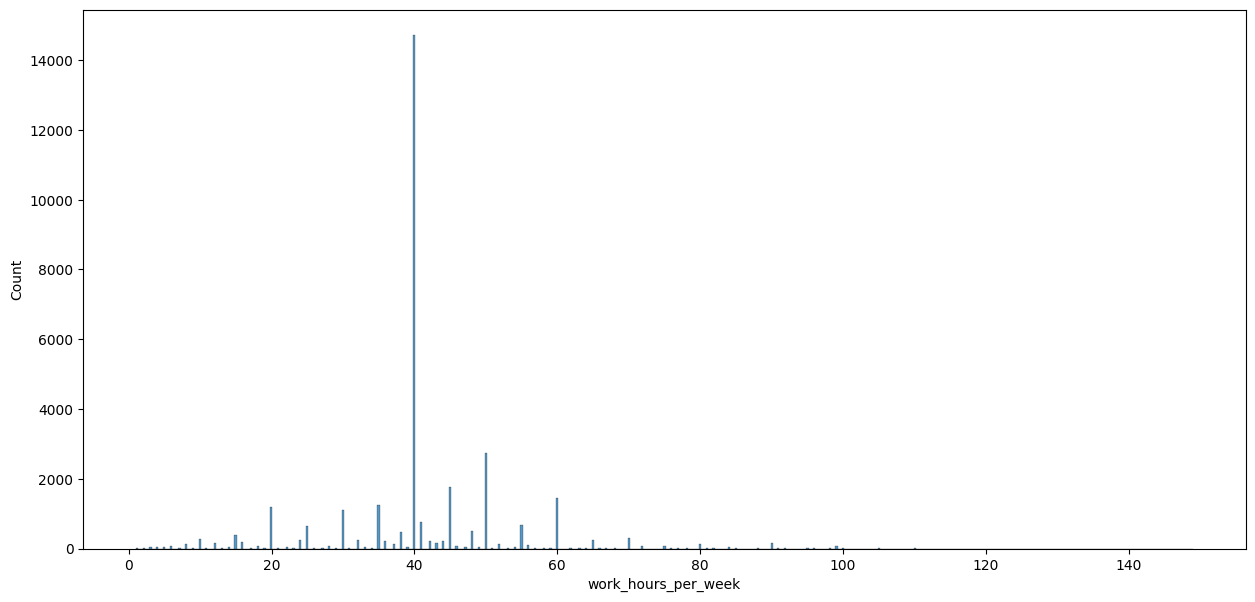

In [23]:
# zróżnicowanie jest duże, możemy zamienić tę zmienną na kategoryczną
sns.histplot(data=df, x='work_hours_per_week')

In [24]:
# funkcja cut przyporządkuje wartości zakres, w którym się znajduje
bins = [-1000, 0, 20, 40, 60, 1000]
pd.cut(df['work_hours_per_week'], bins, labels=False)

0        2
1        1
2        2
3        2
4        2
        ..
32556    2
32557    2
32558    2
32559    2
32560    1
Name: work_hours_per_week, Length: 32538, dtype: int64

In [25]:
df['work_hours_per_week'] = pd.cut(df['work_hours_per_week'], bins, labels=False)

<Axes: xlabel='native_country', ylabel='count'>

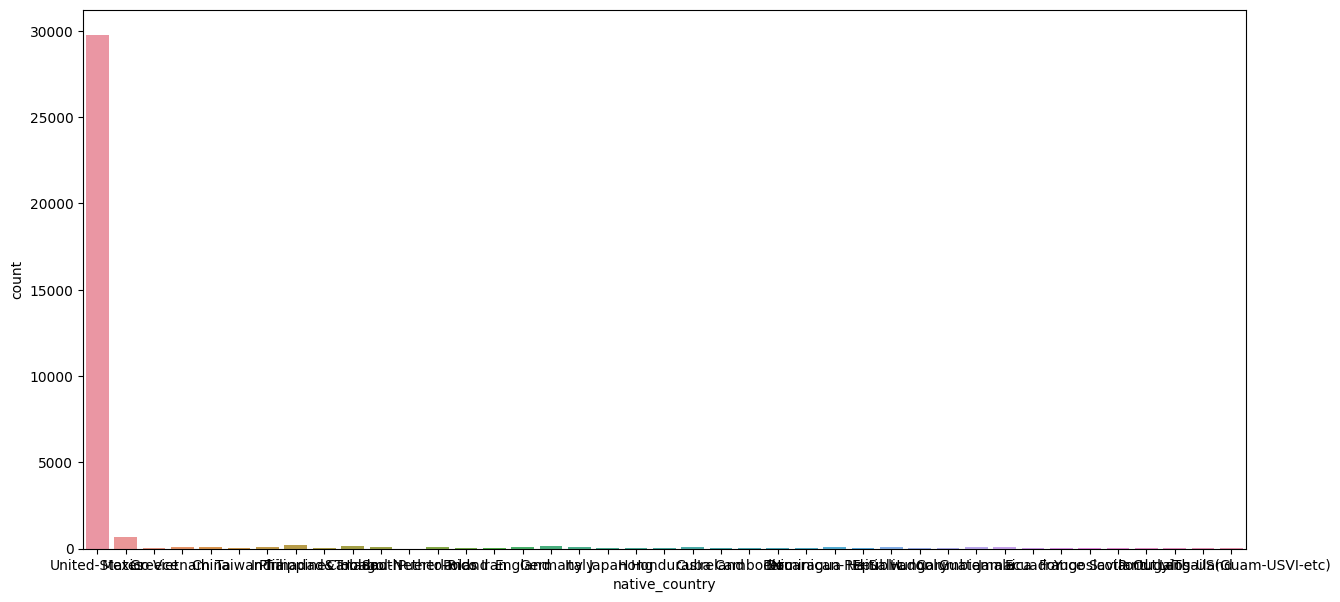

In [26]:
# wyrzucamy kolumnę
sns.countplot(data=df, x='native_country')

In [27]:
df.drop(columns=['native_country'], inplace=True)

<Axes: xlabel='education', ylabel='count'>

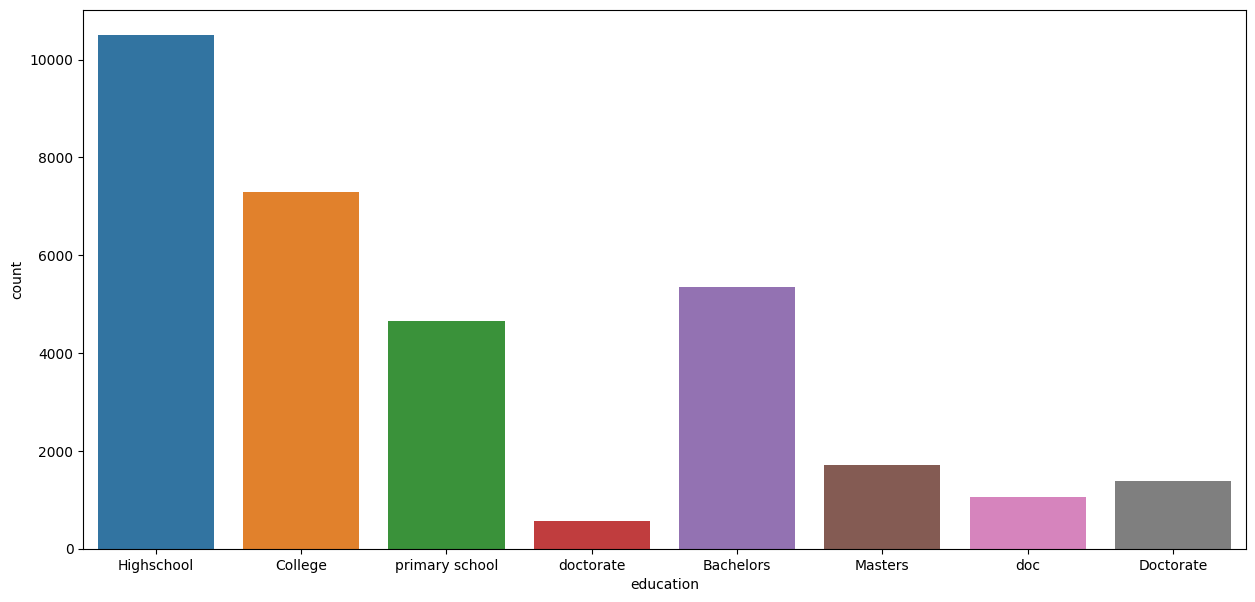

In [28]:
# powielenie wartości Doctorate (doctorate, doc), musimy je połączyć
sns.countplot(data=df, x='education')

In [29]:
df['education'] = df['education'].mask((df['education'] == 'doc') | (df['education'] == 'doctorate'), 'Doctorate')

## Kodowanie zmiennych kategorycznych

Kolejnym krokiem w przygotowywaniu naszych danych jest zamiana zmiennych kategorycznych na liczbowe. Dlaczego taka zmiana jest potrzebna?
* modele uczenia maszynowego to skomplikowane funkcje matematyczne - potrzebują liczb jako argumentów
* czasami zmienne kateogryczne mają swój naturalny porządek (np. mały - średni - duży); odpowiednie kodowanie dostarczy modelowi informacji o tym porządku
* popularne biblioteki do uczenia maszynowego w **Pythonie** (np. używany na tych warsztatach `sklearn`) zwykle nie wspierają wartości kategorycznych


In [30]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [31]:
%%capture

# Przydatne funkcje:

df["education"].unique()  # tabela["zmienna"].unique() ~ zwraca unikalne wartości w danej kolumnie

onehot_encoder = OneHotEncoder(sparse_output=False) # 
new_columns = onehot_encoder.fit_transform(df[["education"]]) # zwraca zakodowaną kolumnę
new_columns_names = onehot_encoder.get_feature_names_out() # zwraca nazwy 

ordinal_encoder = OrdinalEncoder(
    # categories=[['cat_01', 'cat_02', 'cat_03', '...']]
    ) # param categories ustala porządek kodowania
ordinal_encoder.fit_transform(df[["education"]])
ordinal_encoder.get_feature_names_out()

df_temp = pd.DataFrame(data=new_columns, columns=new_columns_names) # tworzy nową tabelę

df.drop(columns=["education"]) # usuwa z tabeli kolumnę
df.join(df_temp) # łączy dwie tabele 

### Zadanie 4. kodowanie zbioru `Census`

### Aktywność 4.
Czas: ok. 7min

Kodujemy pozostałe zmienne kategoryczne. Metodę kodowania (`OrdinalEncoder`, `OneHotEncoder`) wybieramy zgodnie z poznanymi wcześniej praktykami. 

In [32]:
df.head()

,age,workclass,final_pop_weight,education,marital_status,occupation,race,sex,capital_gain,work_hours_per_week,income
0,90.0,Private,77053,Highschool,Widowed,Prof-specialty,White,Female,=0,2,1.0
1,82.0,Private,132870,Highschool,Widowed,Exec-managerial,White,Female,>0,1,1.0
2,66.0,Private,186061,College,Widowed,Prof-specialty,Black,Female,=0,2,1.0
3,54.0,Private,140359,primary school,Divorced,Machine-op-inspct,White,Female,=0,2,1.0
4,41.0,Private,264663,College,Separated,Prof-specialty,White,Female,=0,2,1.0


In [33]:
# workclass powinniśmy zakodować oneHot
onehot_encoder = OneHotEncoder(sparse_output=False) 
new_columns = onehot_encoder.fit_transform(df[["workclass"]]) 
new_columns_names = onehot_encoder.get_feature_names_out() 

df_temp = pd.DataFrame(data=new_columns, columns=new_columns_names) 
df_temp.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [34]:
%%capture

df = df.join(df_temp)

# po zakodowaniu zmiennej nie potrzebujemy już jej w postaci kategorycznej
df = df.drop(columns=['workclass'])

In [35]:
# zmienna education ma swój naturalny porządek, więc możemy ją zakodować wartościami 0,1,2,3,...
ordinal_encoder = OrdinalEncoder(categories=[['primary school', 'Highschool', 'College', 'Bachelors', 'Masters', 'Doctorate']]) # musimy podać kolejność w jakiej będą kodowane wartości
new_columns = ordinal_encoder.fit_transform(df[["education"]]) 
new_columns_names = ordinal_encoder.get_feature_names_out() 

df_temp = pd.DataFrame(data=new_columns, columns=new_columns_names) 
df_temp.head()

,education
0,1.0
1,1.0
2,2.0
3,0.0
4,2.0


In [36]:
%%capture

# po zakodowaniu zmiennej nie potrzebujemy już jej w postaci kategorycznej
df = df.drop(columns=['education'])
df = df.join(df_temp)

In [37]:
# marital_status powinniśmy zakodować oneHot
onehot_encoder = OneHotEncoder(sparse_output=False) 
new_columns = onehot_encoder.fit_transform(df[["marital_status"]]) 
new_columns_names = onehot_encoder.get_feature_names_out() 

df_temp = pd.DataFrame(data=new_columns, columns=new_columns_names) 
df_temp.head()

,marital_status_Divorced,marital_status_Married-civ-spouse,marital_status_Never-married,marital_status_Separated,marital_status_Widowed
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0


In [38]:
%%capture

df = df.join(df_temp)

# po zakodowaniu zmiennej nie potrzebujemy już jej w postaci kategorycznej
df = df.drop(columns=['marital_status'])

In [39]:
# occupation powinniśmy zakodować oneHot
onehot_encoder = OneHotEncoder(sparse_output=False) 
new_columns = onehot_encoder.fit_transform(df[["occupation"]]) 
new_columns_names = onehot_encoder.get_feature_names_out() 

df_temp = pd.DataFrame(data=new_columns, columns=new_columns_names) 
df_temp.head()

,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Prof-specialty,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [40]:
%%capture

df = df.join(df_temp)

# po zakodowaniu zmiennej nie potrzebujemy już jej w postaci kategorycznej
df = df.drop(columns=['occupation'])

In [41]:
# race powinniśmy zakodować oneHot
onehot_encoder = OneHotEncoder(sparse_output=False) 
new_columns = onehot_encoder.fit_transform(df[["race"]]) 
new_columns_names = onehot_encoder.get_feature_names_out() 

df_temp = pd.DataFrame(data=new_columns, columns=new_columns_names) 
df_temp.head()

,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0


In [42]:
%%capture

df = df.join(df_temp)

# po zakodowaniu zmiennej nie potrzebujemy już jej w postaci kategorycznej
df = df.drop(columns=['race'])

In [43]:
# sex oczywiście nie ma naturalnego porządku, ale ponieważ w naszym zbiorze danych są tylko dwie wartości (zmienna binarna) 'male' i 'female' to możemy je zakodować jako 0 i 1 
# (dla modelu nie ma znaczenia, jakich liczb użyjemy, o ile są tylko dwie wartości)
ordinal_encoder = OrdinalEncoder() # nie musimy podawać kolejności wartości, bo nie ma to znaczenia
new_columns = ordinal_encoder.fit_transform(df[["sex"]]) 
new_columns_names = ordinal_encoder.get_feature_names_out() 

df_temp = pd.DataFrame(data=new_columns, columns=new_columns_names) 
df_temp.head()

,sex
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [44]:
%%capture

# po zakodowaniu zmiennej nie potrzebujemy już jej w postaci kategorycznej
df = df.drop(columns=['sex'])
df = df.join(df_temp)

In [45]:
# jak wyżej 
ordinal_encoder = OrdinalEncoder() # nie musimy podawać kolejności wartości, bo nie ma to znaczenia
new_columns = ordinal_encoder.fit_transform(df[["capital_gain"]]) 
new_columns_names = ordinal_encoder.get_feature_names_out() 

df_temp = pd.DataFrame(data=new_columns, columns=new_columns_names) 
df_temp.head()

,capital_gain
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0


In [46]:
%%capture

# po zakodowaniu zmiennej nie potrzebujemy już jej w postaci kategorycznej
df = df.drop(columns=['capital_gain'])
df = df.join(df_temp)

In [47]:
df.head()

,age,final_pop_weight,work_hours_per_week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex,capital_gain
0,90.0,77053,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,82.0,132870,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,66.0,186061,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,54.0,140359,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,41.0,264663,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Transformacje zmiennych

Mamy już ramkę danych posiadającą tylko zmienne liczbowe, bez nulli i z obciętymi outlierami. Ramka w takiej postaci jest już gotowa do użycia jej w celu uczenia modelu. Mimo to, nadal może nasze dane ulepszyć.

#### Po co transformujemy zmienne?

* niektóre modele uczenia maszynowego powstały w oparciu o matematyczne założenia jakie powinny spełniać dane. W szczególności, częstym założeniem jest to, że pojdencze zmienne pochodzą z rozkładu normalnego
* zrzutowanie zmiennych do tego samego przedziału lub kształu pozwala nam później łatwo porównywać ich znaczenie w procesie *XAI* ([artykuł o metodach XAI](https://ema.drwhy.ai/))

#### Których zmiennych nie transformujemy?

* zmienne, które są zakodowanymi wartościami kategorycznymi nie potrzebują kolejnych transformacji.

![rozkład normalny](https://cdn.corporatefinanceinstitute.com/assets/normal-distribution.png)

In [48]:
from sklearn.preprocessing import QuantileTransformer

In [49]:
normal_transformer = QuantileTransformer(output_distribution='normal')
df['age'] = normal_transformer.fit_transform(df[['age']])

<Axes: xlabel='age', ylabel='Count'>

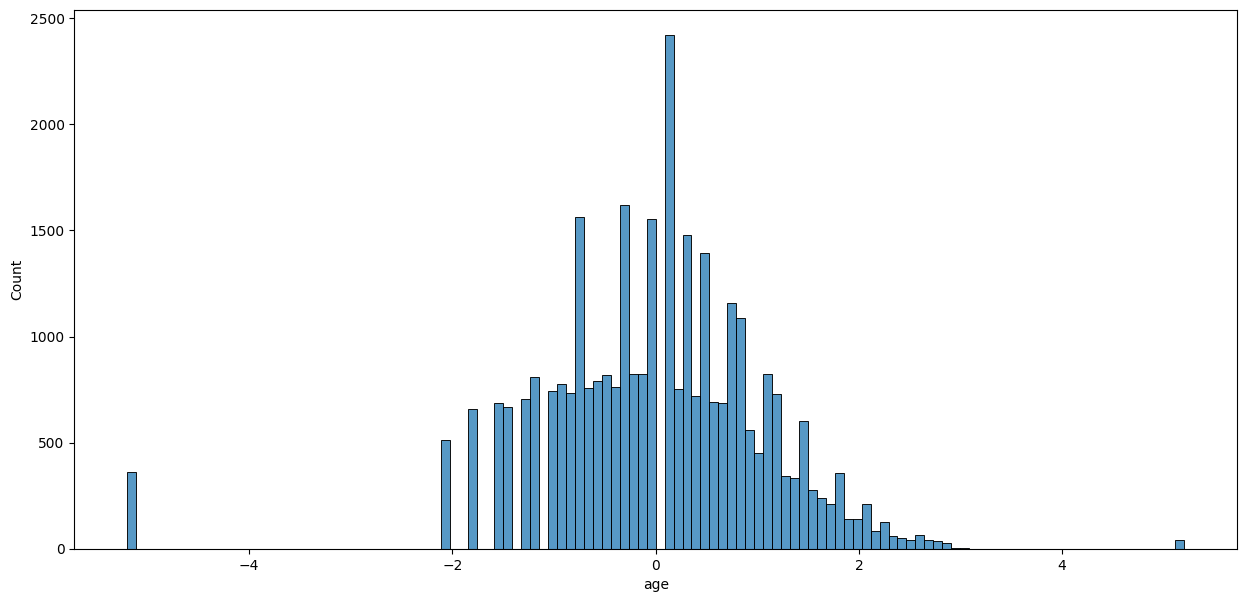

In [59]:
# zmienna age ma ograniczoną liczbę wartości, więc transformacja do rozkładu normalnego nie jest do końca udana
sns.histplot(data=df, x='age')

### Aktywność 5.
Czas: ok. 5min

Przeprowadzamy transformacje zmiennych do rozkładu normalnego.
**Uwaga**: transformacje przeprowadzamy tylko dla zmiennych, które nie były wcześniej kodowane

In [50]:
normal_transformer = QuantileTransformer(output_distribution='normal')
df['final_pop_weight'] = normal_transformer.fit_transform(df[['final_pop_weight']])

<Axes: xlabel='final_pop_weight', ylabel='Count'>

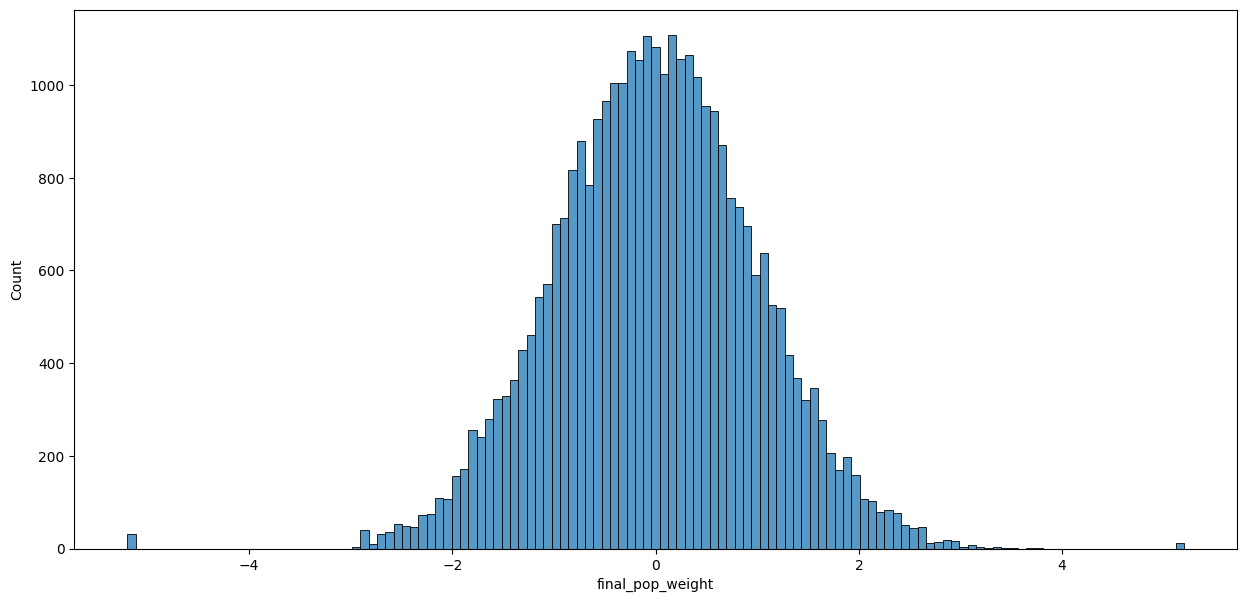

In [58]:
sns.histplot(data=df, x='final_pop_weight')

## Finalna postać danych

In [51]:
df.head()

,age,final_pop_weight,work_hours_per_week,income,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex,capital_gain
0,5.199338,-1.149939,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.829418,-0.500000,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1.910600,0.098586,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.116369,-0.433855,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.337506,0.848770,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Aktywność dodatkowa - zaawansowane kodowanie zmiennych kategorycznych (do wykonania samodzielnie)

Przechodzimy do zbioru **taxis**. Poniżej znajduje się kod, który mapuje dni tygodnia na liczby od 0 do 6. Chcemy je zakodować jako zmienną cykliczną; aby to zrobić wykonamy następujące kroki:
* przeskalujmy zmienne do zakresu $[0, 2\pi]$, np. mnożąc liczby przez $\frac{2\pi}{6}$ (dlaczego przez 6?)
* obliczymy $\sin$ i $\cos$ dla tak przeskalowanych zmiennych
* na koniec wystarczy dodać kolumny z $\sin$ i $\cos$ do tabeli i usunąć starą zmienną reprezentującą dni tygodnia :)

Poniżej znajduje się kod, który zwizualizuje twoje wyniki, sprawdź, czy wygenerowane punkty znajdują się na okręgu!

In [52]:
df_taxis = sns.load_dataset("taxis")
df_taxis['pickup'] = pd.to_datetime(df_taxis['pickup']).dt.weekday
df_taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,5,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,0,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,6,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,5,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [53]:
%%capture

# przydatne funkcje i atrubuty

np.pi # wartość pi
np.cos(2) 
np.sin(2 * np.pi)

df_taxis['pickup'] * 2 * np.pi - 5 # możemy mnożyć całą kolumnę przez stałą

In [54]:
# miejsce na Twoje rozwiązanie :)

In [55]:
# kod do wizualizacji

# sns.scatterplot(x=cos_column, y=sin_column)
# plt.ylim(-2, 2)
# plt.xlim(-2, 2)

## Aktywność dodatkowa - budowa pipelinów (do wykonania samodzielnie)

Zrobiliśmy w trakcie tych warsztatów wiele modyfikacji naszych danych. Chcielibyśmy posiadać narzędzie, które te wszystkie zmiany wykona w ramach jednej funkcji, np. gdybyśmy chcieli analogiczne zmiany zaaplikować do zbioru testowego albo nowo dostarczonych danych. Funkcje, które realizuje ten cel to tzw. `pipeline`'y. W ramach ostatniej sekcji naszych warsztatów spróbujemy zaimplementować klasę, która wykona wszystkie wcześniej wspomniane transformacje za pomocą jednej metody `.transform(dataset)`.

**Przykładowy scenariusz**: 
* napisanie własnej klasy do maskowania danych; atrybutem klasy byłaby lista wartości, które oznaczamy jako `None`. [jak napisać własny transformer?](https://towardsdatascience.com/pipelines-custom-transformers-in-scikit-learn-the-step-by-step-guide-with-python-code-4a7d9b068156); klasa używałaby funkcji `.mask()` oraz `.isin()`
* napisanie własnej klasy do obcinania danych oraz łączenia kategorii (patrz: *aktywność 3.*)
* użycie transformerów z biblioteki `sklearn` do pozostałych kroków
* połączenie wszystkich kroków za pomocą `ColumnTransformer` ([link](https://machinelearningmastery.com/columntransformer-for-numerical-and-categorical-data/)) oraz `make_pipeline` [link](https://towardsdatascience.com/building-a-machine-learning-pipeline-3bba20c2352b)


In [56]:
from sklearn.base import BaseEstimator, TransformerMixin 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

#### Przydatne linki
* [`miceforest`](https://pypi.org/project/miceforest/) - imputacja braków danych za pomocą modeli uczenia maszynowego
* [`pycircural`](https://towardsdatascience.com/introducing-pycircular-a-python-library-for-circular-data-analysis-bfd696a6a42b) - obsługa kodowania zmiennych cyklicznych
* [`feature-engine`](https://feature-engine.trainindata.com/en/latest/) - automatyzacja procesu przygotowywania danych